In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimpy import skim

exch_rate = pd.read_csv('C:/Users/MADONNA/Desktop/Old HDD/Downloads/project materials/Volatility Data.csv')
exch_rate["INF"] = exch_rate["INF"]/100
exch_rate.head()

,Month,ASI,CBNX,BDCX,INF
0,Jan-04,22712.88,137.76,147.65,0.224
1,Feb-04,25169.20,136.44,142.95,0.248
2,Mar-04,22800.41,134.80,139.92,0.225
3,Apr-04,25792.97,137.23,138.85,0.175
4,May-04,27730.84,134.81,139.64,0.198


In [3]:
#log of retuns of variables.
exch_rate['LASI'] = np.log(exch_rate['ASI']/exch_rate['ASI'].shift()).replace(np.nan,0)
exch_rate['LCBNX'] = np.log(exch_rate['CBNX']/exch_rate['CBNX'].shift()).replace(np.nan,0)
exch_rate['LBDCX'] = np.log(exch_rate['BDCX']/exch_rate['BDCX'].shift()).replace(np.nan,0)
exch_rate['LINF'] = np.log(exch_rate['INF']/exch_rate['INF'].shift()).replace(np.nan,0)


exch_rate.head()


,Month,ASI,CBNX,BDCX,INF,LASI,LCBNX,LBDCX,LINF
0,Jan-04,22712.88,137.76,147.65,0.224,0.000000,0.000000,0.000000,0.000000
1,Feb-04,25169.20,136.44,142.95,0.248,0.102689,-0.009628,-0.032350,0.101783
2,Mar-04,22800.41,134.80,139.92,0.225,-0.098843,-0.012093,-0.021424,-0.097328
3,Apr-04,25792.97,137.23,138.85,0.175,0.123323,0.017866,-0.007677,-0.251314
4,May-04,27730.84,134.81,139.64,0.198,0.072443,-0.017792,0.005673,0.123481


In [ ]:
exch_rate.to_excel(r'C:\Users\MADONNA\Desktop\project materials\volatility data2.xlsx', index=False)

C:\Users\MADONNA\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Iteration:      1,   Func. Count:      6,   Neg. LLF: 78763024.47466592
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4754098.964202288
Iteration:      3,   Func. Count:     28,   Neg. LLF: 5212.54424559118
Iteration:      4,   Func. Count:     34,   Neg. LLF: 3.741601163793947e+17
Iteration:      5,   Func. Count:     45,   Neg. LLF: 5779083.41021501
Iteration:      6,   Func. Count:     55,   Neg. LLF: -569.2701962821161
Optimization terminated successfully    (Exit mode 0)
            Current function value: -569.2701969793511
            Iterations: 10
            Function evaluations: 55
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  LCBNX   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                569.270
Distribution:                  Normal   

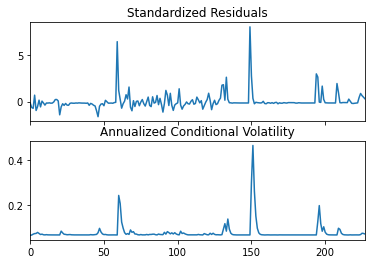

In [4]:
from arch import arch_model
import arch


LCBNXVol = arch.arch_model(exch_rate['LCBNX'], vol='garch', p=1, o=0, q=1, rescale='false')
result2 =LCBNXVol.fit()
print (result2.summary())
fig = result2.plot(annualize='M')
plt.show()


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3438097.4199199392
Iteration:      2,   Func. Count:     16,   Neg. LLF: 381.3953004004239
Iteration:      3,   Func. Count:     25,   Neg. LLF: -269.79977445957326
Iteration:      4,   Func. Count:     32,   Neg. LLF: -269.36903402692064
Iteration:      5,   Func. Count:     39,   Neg. LLF: -289.9037058031376
Iteration:      6,   Func. Count:     45,   Neg. LLF: -290.31812953004254
Iteration:      7,   Func. Count:     50,   Neg. LLF: -290.3181398509083
Iteration:      8,   Func. Count:     55,   Neg. LLF: -290.31814070490657
Optimization terminated successfully    (Exit mode 0)
            Current function value: -290.31814070490657
            Iterations: 8
            Function evaluations: 55
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   LASI   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R

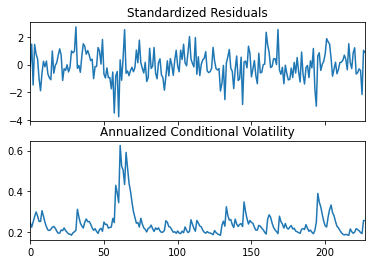

In [5]:
LASIvol = arch.arch_model(exch_rate['LASI'], vol='garch', p=1, o=0, q=1, rescale='true')
result1 =LASIvol.fit()
print (result1.summary())

# Plot the standardized residuals
fig = result1.plot(annualize='M')
plt.show()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 113812293.51069288
Iteration:      2,   Func. Count:     18,   Neg. LLF: 263.36288065383076
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2158818.333754821
Iteration:      4,   Func. Count:     37,   Neg. LLF: 425.3161841530619
Iteration:      5,   Func. Count:     44,   Neg. LLF: 7444719.75411943
Iteration:      6,   Func. Count:     52,   Neg. LLF: -501.3890225902382
Optimization terminated successfully    (Exit mode 0)
            Current function value: -501.3890239485752
            Iterations: 10
            Function evaluations: 52
            Gradient evaluations: 6
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  LBDCX   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                501.389
Distribution:                  Normal   A

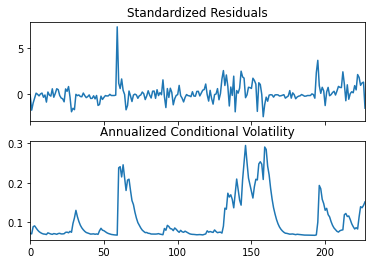

<Figure size 432x288 with 0 Axes>

In [6]:
LBDCXvol = arch.arch_model(exch_rate['LBDCX'], vol='garch', p=1, o=0, q=1, rescale='true')
result3 =LBDCXvol.fit()
print (result3.summary())
fig = result3.plot(annualize='M')
plt.show()
plt.savefig('LBDCX Annualized Volatility')

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1321401.7637381572
Iteration:      2,   Func. Count:     17,   Neg. LLF: -248.69993899069505
Optimization terminated successfully    (Exit mode 0)
            Current function value: -248.69993954003388
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   LINF   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                248.700
Distribution:                  Normal   AIC:                          -489.400
Method:            Maximum Likelihood   BIC:                          -475.682
                                        No. Observations:                  228
Date:                Wed, May 17 2023   Df Residuals:                      227
Time:       

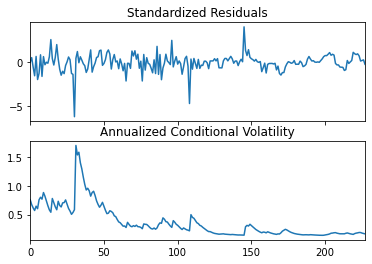

In [7]:
LINFvol = arch.arch_model(exch_rate['LINF'], vol='garch', p=1, o=0, q=1, rescale='true')
result4 =LINFvol.fit()
print (result4.summary())
fig = result4.plot(annualize='M')
plt.show()


# Granger Causality Test

In [10]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(exch_rate[['LCBNX','LASI']], maxlag=[1])
grangercausalitytests(exch_rate[['LBDCX','LASI']], maxlag=[1])
grangercausalitytests(exch_rate[['LINF', 'LASI']], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.0043  , p=0.3173  , df_denom=224, df_num=1
ssr based chi2 test:   chi2=1.0178  , p=0.3130  , df=1
likelihood ratio test: chi2=1.0155  , p=0.3136  , df=1
parameter F test:         F=1.0043  , p=0.3173  , df_denom=224, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.1376 , p=0.0010  , df_denom=224, df_num=1
ssr based chi2 test:   chi2=11.2867 , p=0.0008  , df=1
likelihood ratio test: chi2=11.0151 , p=0.0009  , df=1
parameter F test:         F=11.1376 , p=0.0010  , df_denom=224, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7354  , p=0.3920  , df_denom=224, df_num=1
ssr based chi2 test:   chi2=0.7453  , p=0.3880  , df=1
likelihood ratio test: chi2=0.7440  , p=0.3884  , df=1
parameter F test:         F=0.7354  , p=0.3920  , df_denom=224, df_num=1


{1: ({'ssr_ftest': (0.7354169220814964, 0.39204956156768556, 224.0, 1),
   'ssr_chi2test': (0.7452662558593737, 0.38797911325800594, 1),
   'lrtest': (0.744045530962353, 0.38836802418117544, 1),
   'params_ftest': (0.7354169220815509, 0.39204956156766935, 224.0, 1.0)},
   array([[0., 1., 0.]])])}

In [13]:
#perform Reverse Granger-Causality test
grangercausalitytests(exch_rate[['LASI','LCBNX']], maxlag=[1])
grangercausalitytests(exch_rate[['LASI','LBDCX']], maxlag=[1])
grangercausalitytests(exch_rate[['LASI', 'LINF']], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0724  , p=0.0810  , df_denom=224, df_num=1
ssr based chi2 test:   chi2=3.1135  , p=0.0776  , df=1
likelihood ratio test: chi2=3.0924  , p=0.0787  , df=1
parameter F test:         F=3.0724  , p=0.0810  , df_denom=224, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.5262  , p=0.0617  , df_denom=224, df_num=1
ssr based chi2 test:   chi2=3.5734  , p=0.0587  , df=1
likelihood ratio test: chi2=3.5456  , p=0.0597  , df=1
parameter F test:         F=3.5262  , p=0.0617  , df_denom=224, df_num=1

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7630  , p=0.3833  , df_denom=224, df_num=1
ssr based chi2 test:   chi2=0.7732  , p=0.3792  , df=1
likelihood ratio test: chi2=0.7719  , p=0.3796  , df=1
parameter F test:         F=0.7630  , p=0.3833  , df_denom=224, df_num=1


{1: ({'ssr_ftest': (0.7630279141774624, 0.38331808007535695, 224.0, 1),
   'ssr_chi2test': (0.7732470380280534, 0.3792144257625971, 1),
   'lrtest': (0.7719330366282975, 0.37961971550687634, 1),
   'params_ftest': (0.7630279141774113, 0.3833180800753725, 224.0, 1.0)},
   array([[0., 1., 0.]])])}

In [4]:
from statsmodels.tsa.stattools import adfuller


Text(0.5, 0, 'LINF')

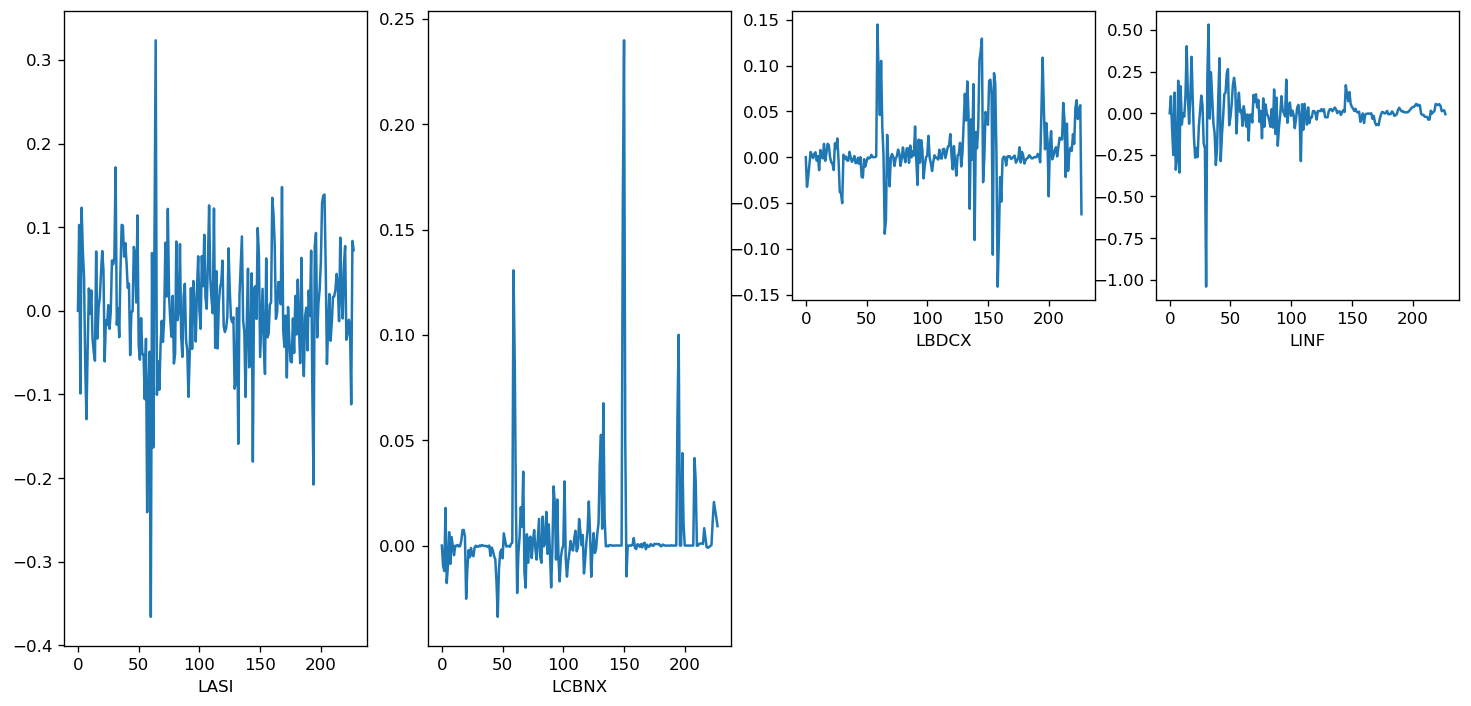

In [22]:
plt.figure(figsize=(15,7),dpi=120)
plt.subplot(1,4,1)
data1=exch_rate['LASI']
plt.plot(data1)
plt.xlabel('LASI')

plt.subplot(1,4,2)
data2=exch_rate['LCBNX']
plt.plot(data2)
plt.xlabel('LCBNX')

plt.subplot(2,4,3)
data3=exch_rate['LBDCX']
plt.plot(data3)
plt.xlabel('LBDCX')

plt.subplot(2,4,4)
data4=exch_rate['LINF']
plt.plot(data4)
plt.xlabel('LINF')

In [12]:
result = adfuller(data1, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.193008202418048
n_lags: 2.4755039448275847e-10
p-value: 2.4755039448275847e-10
Critial Values:
   1%, -3.459884913337196
Critial Values:
   5%, -2.8745310704320794
Critial Values:
   10%, -2.573693840082908


In [23]:
result = adfuller(data2, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -7.1909790103576725
n_lags: 2.5041848749098227e-10
p-value: 2.5041848749098227e-10
Critial Values:
   1%, -3.459884913337196
Critial Values:
   5%, -2.8745310704320794
Critial Values:
   10%, -2.573693840082908


In [24]:
result = adfuller(data3, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.568194584511461
n_lags: 0.006399013847859874
p-value: 0.006399013847859874
Critial Values:
   1%, -3.460849270544952
Critial Values:
   5%, -2.87495318813585
Critial Values:
   10%, -2.5739190539191745


In [25]:
result = adfuller(data4, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.881470105679946
n_lags: 3.7889392722745955e-05
p-value: 3.7889392722745955e-05
Critial Values:
   1%, -3.461136478222043
Critial Values:
   5%, -2.875078880098608
Critial Values:
   10%, -2.5739861168199027


ADF Statistic: -2.168085778610023
n_lags: 0.2180316488403271
p-value: 0.2180316488403271
Critial Values:
   1%, -3.460018927623594
Critial Values:
   5%, -2.8745897386146817
Critial Values:
   10%, -2.57372514086348


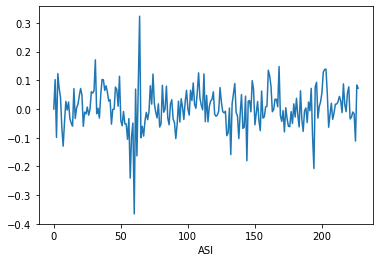

In [26]:
data6=exch_rate['ASI']
plt.plot(data1)
plt.xlabel('ASI')
result = adfuller(data6, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.5570490848151985
n_lags: 0.9977228238245188
p-value: 0.9977228238245188
Critial Values:
   1%, -3.4615775784078466
Critial Values:
   5%, -2.875271898983725
Critial Values:
   10%, -2.5740891037735847


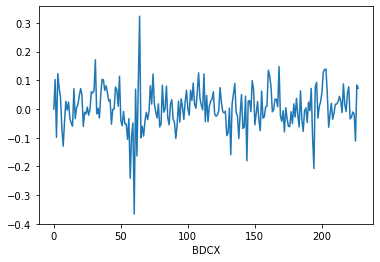

In [28]:
data7=exch_rate['BDCX']
plt.plot(data1)
plt.xlabel('BDCX')
result = adfuller(data7, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')